In [1]:
from inference_model_utils import *
from torch import optim
from torchsummary import summary

#### Основная информация по работе:

0. Использовались 50% от общего числа данных, разбитые на train-val-test в соотношении 70-15-15%

1. Файл submit_notebook.ipynb содержит основной ноутбук по обучению, там я обучал модели в рамках "творческой лаборатории". Файл 
indoor_outdoor_processing_cnn.ipynb - просто тренировочный

2. Файл inference_model_utils.py содержит все функции, которые импортированы в текущем файле ineference_example.ipynb, в котором демонстрируется работа модели.


3. Папка pictures - вставленные в ноутбуки скриншоты из TensorBoard.

4. Папка runs - логиты TensorBoard, если захотите посмотреть логиты.

5. Также есть файлы double_conv_model_augmentated.pth и double_conv_model_augmentated_croped.pth, где веса модели. (P.S. - размер файла очень большой, на портале не удается загрузить. Если надо, могу скинуть иначе)

In [ ]:
train_loader, validation_loader, test_loader = get_dataloaders(transform=base_transform_64,
                                                               augmentation=base_augmentation,
                                                               batch_size=250,
                                                               difference=12000) 

model_not_cropped = CNNIndoorOutdoorDoubleConvAugmentated()
optimizer = optim.Adam(model_not_cropped.parameters(), lr=0.001)  
optimizer_adadelta = optim.Adadelta(model_not_cropped.parameters(), lr=0.0005)
criterion = nn.BCELoss()
path_tensorboard = 'runs/running_indoor_outdoor_model_double_convolution'
writer = SummaryWriter(path_tensorboard)  

In [ ]:
train_model(model_not_cropped, train_loader, validation_loader, criterion, optimizer,
             file = 'double_conv_model_augmentated.pth', num_epochs=6, first_flag=False, optimizer_new_flag=False,
             optimizer_new=optimizer_adadelta)

In [4]:
print(load_checkpoint(model_not_cropped, optimizer, filename='double_conv_model_augmentated.pth'))

Checkpoint loaded. Epoch: 15, Loss: 0.21260762214660645, Accuracy: 0.9174261253797293
(15, tensor(0.2126), 0.9174261253797293)


/Users/chervonikov_alexey/Desktop/projects/Technopark_Autumn_2024/Нейронки/third_lesson_cnn/HomeWorkFolder/inference_model_utils.py:165: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental 

In [10]:
cp, cm, acc = predict_model(model_not_cropped, test_loader, 'cpu')

  0%|          | 0/131 [00:00<?, ?it/s]

In [11]:
print(acc)

0.9086836452899663


In [12]:
print(cp)

              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91     16065
         1.0       0.94      0.87      0.91     16525

    accuracy                           0.91     32590
   macro avg       0.91      0.91      0.91     32590
weighted avg       0.91      0.91      0.91     32590



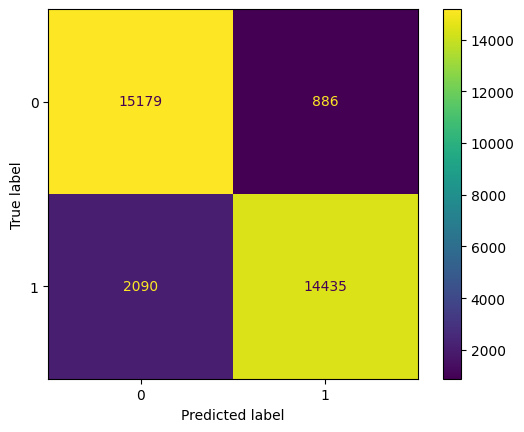

In [13]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#### Cropped model:

In [33]:
model_cropped = CNNIndoorOutdoorDoubleConvAugmentatedCrop()
optimizer = optim.Adam(model_cropped.parameters(), lr=0.001) 
load_checkpoint(model_cropped, optimizer, filename='double_conv_model_augmentated_croped.pth')

Checkpoint loaded. Epoch: 1, Loss: 0.27140578627586365, Accuracy: 0.8988922642609469


/Users/chervonikov_alexey/Desktop/projects/Technopark_Autumn_2024/Нейронки/third_lesson_cnn/HomeWorkFolder/inference_model_utils.py:165: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental 

(1, tensor(0.2714), 0.8988922642609469)

In [19]:
train_loader_cropped, validation_loader_cropped, test_loader_cropped = get_dataloaders(transform=left_upper_corner_transfrom,
                                                               augmentation=base_augmentation_no_norm,
                                                               batch_size=250,
                                                               difference=12000) 

In [25]:
cp_cropped, cm_cropped, acc_cropped = predict_model(model_cropped, test_loader_cropped, 'cpu')

  0%|          | 0/131 [00:00<?, ?it/s]

In [26]:
print(acc_cropped)

0.8937404111690702


In [28]:
print(cp_cropped)

              precision    recall  f1-score   support

         0.0       0.87      0.92      0.89     16065
         1.0       0.91      0.87      0.89     16525

    accuracy                           0.89     32590
   macro avg       0.89      0.89      0.89     32590
weighted avg       0.89      0.89      0.89     32590



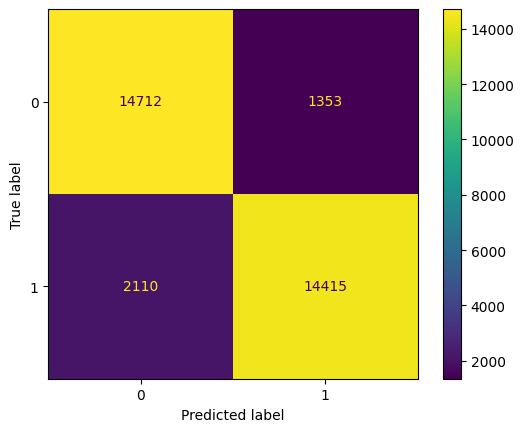

In [29]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_cropped)
disp.plot()
plt.show()

#### Summary of 1st (best from my research) model:

In [36]:
summary(model_not_cropped, (3, 64, 64))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 64]           1,792
              ReLU-2           [-1, 64, 64, 64]               0
            Conv2d-3           [-1, 64, 64, 64]          36,928
              ReLU-4           [-1, 64, 64, 64]               0
         MaxPool2d-5           [-1, 64, 32, 32]               0
            Conv2d-6           [-1, 32, 32, 32]          18,464
              ReLU-7           [-1, 32, 32, 32]               0
            Conv2d-8           [-1, 32, 32, 32]           9,248
              ReLU-9           [-1, 32, 32, 32]               0
        MaxPool2d-10           [-1, 32, 16, 16]               0
           Conv2d-11           [-1, 64, 16, 16]          18,496
             ReLU-12           [-1, 64, 16, 16]               0
           Conv2d-13           [-1, 64, 16, 16]          36,928
             ReLU-14           [-1, 64,

#### Model Inference:

  0%|          | 0/131 [00:00<?, ?it/s]

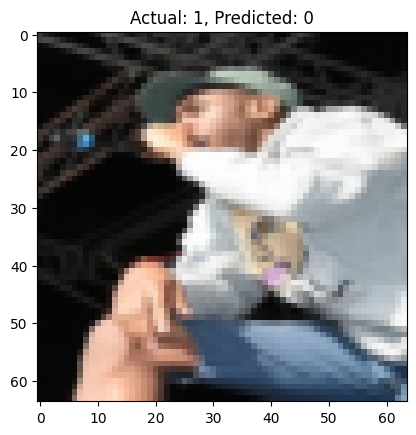

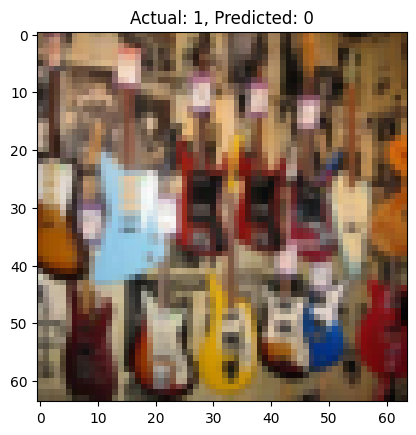

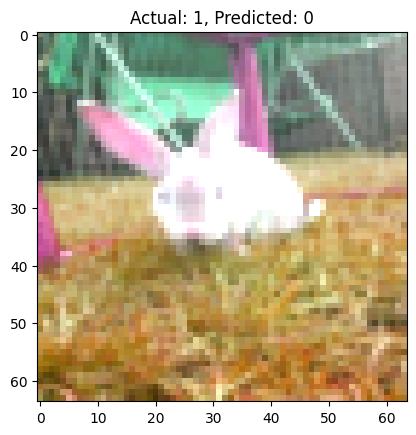

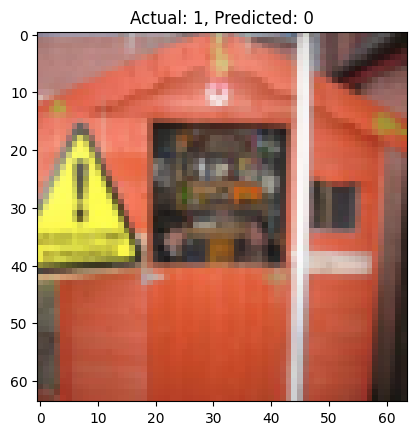

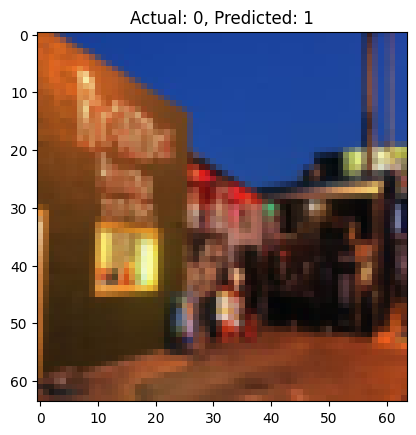

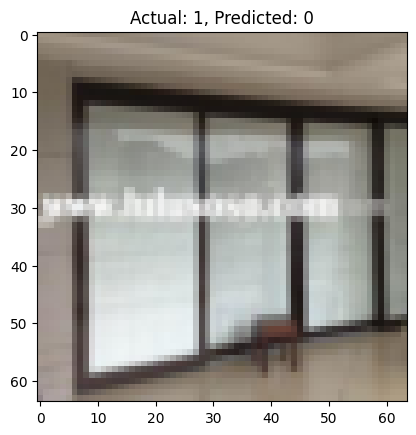

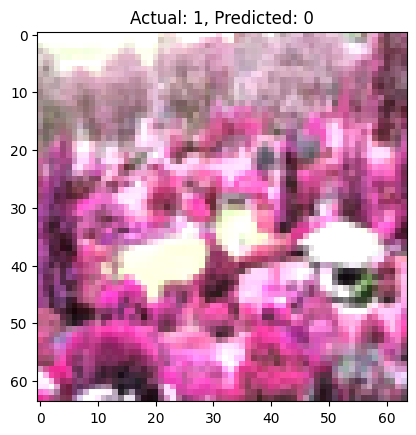

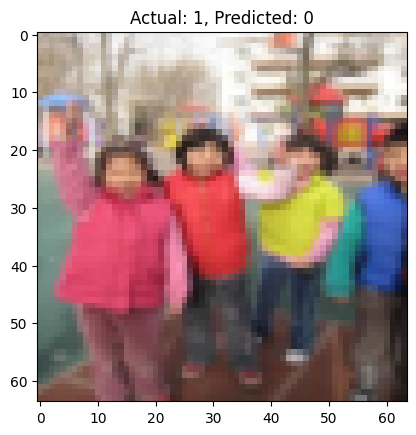

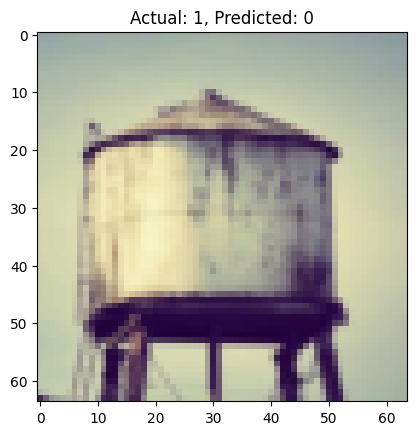

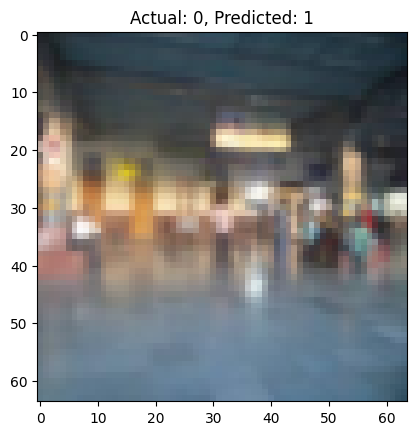

In [5]:
losses = inference_and_visualize_errors(model_not_cropped, test_loader)

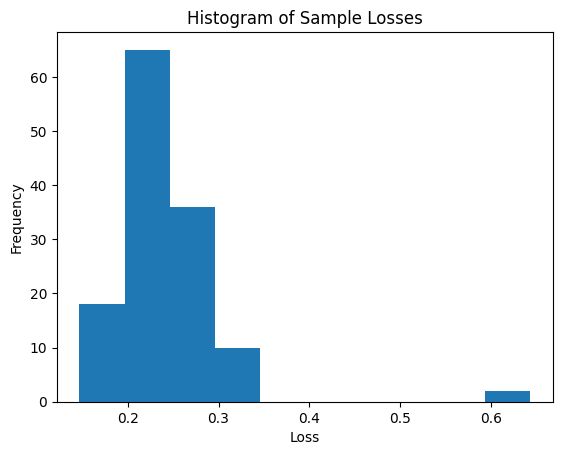

In [6]:
plt.hist(losses)
plt.title('Histogram of Sample Losses')
plt.xlabel('Loss')
plt.ylabel('Frequency')
plt.show()

#### Итоговые наблюдения:

#### Применил два подхода, притом по сути одну модель. 

>Первый подход сопровождался нормализацией изображений, сокращением их размера до 64 x 64. Данная модель показала лучшую метрику $accuracy \approx 0.91$. Модель оказалась сбалансированной, поскольку не переобучалась (существенного разрыва между train и val и по loss, и по accuracy не наблюдалось).

>Второй подход сопровождался отсутствием нормализации изображений. Здесь я решил применить обрезку левого верхнего угла для обучения именно по нему. Полагалось, что там содержится фон и по нему можно что-то предсказать. Как итог, получилась более низкая метрика $accuracy \approx 0.89$. Модель быстро переобучилась, показав расхождение по loss и accuracy уже с 9 эпохи.

>Думаю, есть смысл добавить число слоев и каналов, увеличив число параметров. Или обучить на большем количестве данных.

>Все логиты сохранены в TensorBoard. Если не откроется, то ниже есть скрины:

#### TensorBoard logits:

<img src="pictures/logits_tensorboard.png" style="height: 500px; width:750px;"/>

#### Розовая кривая - вторая модель, серая - первая.